## <font color='blue'>Análise Estatística</font>

Problema de Negócio:

Qual a relação  do valor do aluguel em uma determinada cidade?


In [6]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Carregando os Dados e Análise Exploratória


In [7]:
df = pd.read_csv('dataset.csv')

In [8]:
#Verificando as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [10]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [16]:
# Resumo estatístico do dataset
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [17]:
# Resumo estatístico somente da variável alvo (valor_aluguel)
df["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

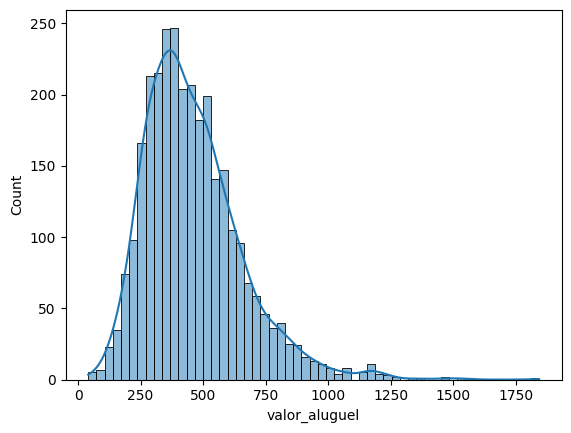

In [21]:
# Histograma da variável alvo para melhor visualização
sns.histplot(data = df, x = "valor_aluguel", kde = True)

In [22]:
# Correlação entre as variáveis
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


Conforme os dados da Correlação entre as variáveis, utilizarei a area_m2 como minha variavel preditora, pois é a variavel que mais se aproxima de 1.

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

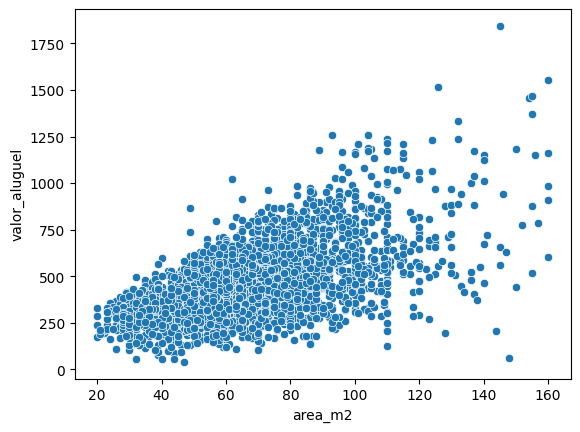

In [23]:
# Analisando a relação entre a variável de entrada area_m2 e a variável alvo valor_aluguel 
sns.scatterplot(data = df, x = "area_m2", y = "valor_aluguel")


Conforme o Grafico acima, nota-se que realmente temos uma relação entre as variáveis area_m2 e a valor_aluguel. Podemos notar também que conforme aumenta a area m2 aumenta-se o valor do aluguel.

## Construção do Modelo
Construção do Modelo OLS para verificar com mais precisão 

In [24]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [25]:
# Definimos a variável dependente
y = df["valor_aluguel"]
X = df["area_m2"]

In [26]:
# Adição de uma constante à variável independente
X =sm.add_constant(X)

In [27]:
# Criamos o modelo
modelo = sm.OLS(y, X)

In [28]:
# Treinamento do modelo
resultado = modelo.fit()

In [29]:
# Imprimindo o resultado
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          6.84e-275
Time:                        09:50:29   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

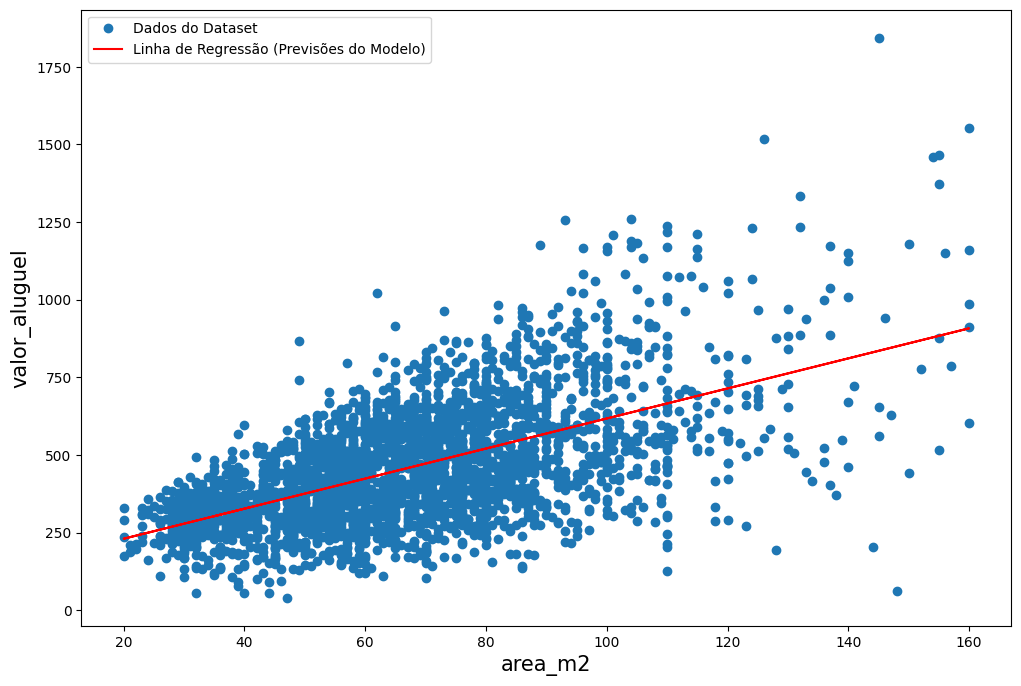

In [36]:
# Plot com o grafico anterior junto com o resultado do modelo, para melhor visualização do resultado
plt.figure(figsize = (12, 8))
plt.xlabel("area_m2", size = 15)
plt.ylabel("valor_aluguel", size = 15)
plt.plot(X["area_m2"], y, "o", label = "Dados do Dataset")
plt.plot(X["area_m2"], resultado.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()


## Conclusão

Claramente existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Porém, apenas a área dos imóveis não é suficiente para explicar a variação no valor do aluguel, pois nosso modelo obteve um coeficiente de determinação (R²) de apenas 0.34.

O ideal seria usar mais variáveis de entrada para construir o modelo a fim de compreender se outros fatores influenciam no valor do aluguel.

É importante deixar claro que correlação não implica causalidade e que não podemos afirmar que o valor do aluguel muda apenas devido à área dos imóveis.